# Logistic Regression Model

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, f1_score)
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

# Configure matplotlib for inline plotting
%matplotlib inline

In [2]:
# Load environment variables from .env file
load_dotenv()

# Get directory paths from environment variables
NOTEBOOKS_DIR_PATH = os.getenv('NOTEBOOKS_DIR_PATH')
DATASETS_DIR_PATH = os.getenv('DATASETS_DIR_PATH')
RAPORTS_DIR_PATH = os.getenv('RAPORTS_DIR_PATH')
MODELS_DIR_PATH = os.getenv('MODELS_DIR_PATH')

# Define file paths
processed_data_path = os.path.join('..', DATASETS_DIR_PATH, 'processed_data.csv')
models_dir = os.path.join('..', MODELS_DIR_PATH)

# Ensure the directory exists
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Load the processed data
df = pd.read_csv(processed_data_path)

## Data Preparation

We will prepare the data for modeling by separating the features and the target variable, and then splitting the data into training and testing sets.


In [ ]:
# Separate features and target variable
X = df.drop('passed', axis=1)
y = df['passed']

# Split the data into training and testing sets
# We can set a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Logistic Regression Model Training

We will create an instance of the Logistic Regression model and train it on the training data.

In [4]:
# Create an instance of LogisticRegression
logistic_model = LogisticRegression(max_iter=1000, random_state=0)

# Train the model
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

## Model Evaluation

We will evaluate the trained model using various metrics such as accuracy, confusion matrix, classification report, and ROC curve.

In [5]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.4f}")

Accuracy of the model: 0.6303


Confusion Matrix:
[[11 39]
 [ 5 64]]


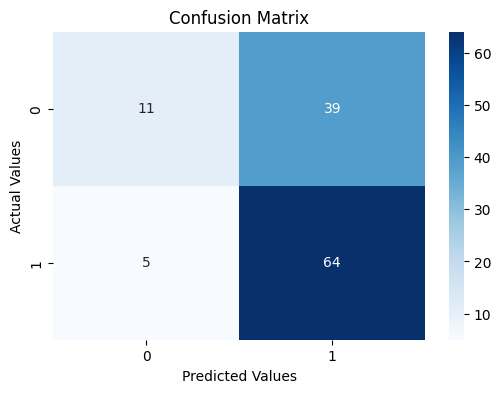

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [7]:
# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.22      0.33        50
         1.0       0.62      0.93      0.74        69

    accuracy                           0.63       119
   macro avg       0.65      0.57      0.54       119
weighted avg       0.65      0.63      0.57       119



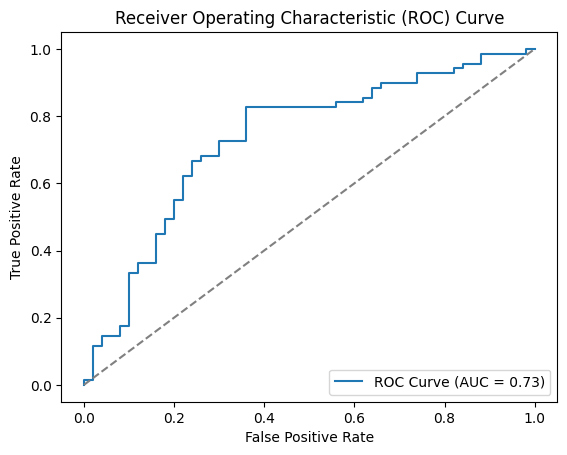

In [8]:
# ROC Curve and AUC
y_pred_proba = logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0,1],[0,1],'--', color='grey')
plt.legend(loc=4)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [9]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score of the model: {f1:.4f}")

F1 Score of the model: 0.7442


## Hyperparameter Tuning

We can improve the model's performance by tuning hyperparameters using techniques such as Grid Search with Cross-Validation.

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
}

# Create a GridSearchCV object
grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=0), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [11]:
# Best parameters from Grid Search
print(f"Best parameters: {grid.best_params_}")

Best parameters: {'C': 0.1, 'solver': 'liblinear'}


In [12]:
# Train the model with the best parameters
best_logistic_model = grid.best_estimator_

# Evaluate the model
y_pred_best = best_logistic_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Improved Accuracy of the model: {accuracy_best:.4f}")

# F1 Score
f1_best = f1_score(y_test, y_pred_best)
print(f"Improved F1 Score of the model: {f1_best:.4f}")

Improved Accuracy of the model: 0.5966
Improved F1 Score of the model: 0.7391


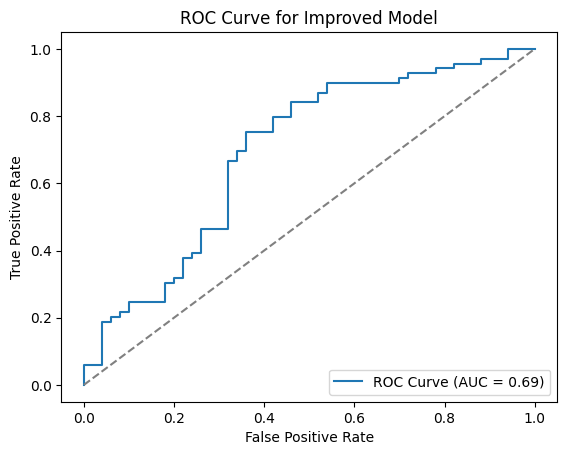

In [13]:
# ROC Curve and AUC for the improved model
y_pred_proba_best = best_logistic_model.predict_proba(X_test)[::,1]
fpr_best, tpr_best, _ = roc_curve(y_test,  y_pred_proba_best)
auc_best = roc_auc_score(y_test, y_pred_proba_best)
plt.plot(fpr_best, tpr_best, label=f"ROC Curve (AUC = {auc_best:.2f})")
plt.plot([0,1],[0,1],'--', color='grey')
plt.legend(loc=4)
plt.title('ROC Curve for Improved Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Save the Trained Model

We can save the trained model to a file for later use or deployment.


In [14]:
model_path = os.path.join(models_dir, 'logistic_regression_model.joblib')
joblib.dump(best_logistic_model, model_path)
print(f"Model saved to {model_path}")

Model saved to ..\models\logistic_regression_model.joblib
